# TP 1 : Optimisation avec contrainte

In [1]:
# Les bibliothèques nécessaires pour tout le TP
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Exercice 1 (mise en oeuvre d'une méthode de gradient projeté et de pénalisation).
On considère la fonction $J$ définie sur $\mathbb{R}^2$ par : $J(x, y)=2 x^2+3 x y+2 y^2$. On appelle $Q$ le cadran défini par :
$$
Q=\left\{x \leqslant-\frac{1}{2}, y \leqslant-\frac{1}{2}\right\} .
$$

# 1. Analyse théorique du problème.


# a) Quelle est la solution du problème de minimisation de $J$ sans contrainte ?











# Réponse :
La fonction J est un polynome  de R^2 dans R de class $C^{\infty}$ donc il est continue or R^2 fermé de dimension fini et la fonction $J$ coercive en effet:

$J(x,y) = 2x^2 + 3xy + 2y^2 \\
\quad \quad \quad \quad \geq 2x^2 - \frac{3}{2} (x^2 + y^2) + 2y^2 \quad |xy|\leq \frac{1}{2} (x^2 + y^2) \\
\quad \quad \quad \quad \geq \frac{1}{2} (x^2 + y^2) \\
\quad \quad \quad \quad = \frac{1}{2} ||(x,y)||^2 \\
\quad \quad \quad \quad = \frac{1}{2} \phi(r) \underset{r \rightarrow \infty}{\rightarrow} +\infty     \quad avec \quad r = ||(x,y)|| $ 

Donc la fonction J admet un minimum 
pour l'unicité il suffit de prouver qu’il est strictement convexe pour cela on va calculer l’hessien de J et on regarde s’il est bien définie positive
\begin{align*}
\nabla^2 J(x, y) &= 
\begin{pmatrix}
4 & 0 \\
0 & 4
\end{pmatrix} \\
\end{align*}

Donc le problème admet une unique solution et il va vérifier l’équation d’Euler.

  Soit $(\bar{x},\bar{y})\in \mathbb{R}^2$ un point critique de $J$, Alors on a la caractérisation d'Euler :
\begin{align*}
\nabla f(\bar{x},\bar{y}) &= \begin{pmatrix}
    2\bar{x}+3\bar{y} \\
    3\bar{x}+4\bar{y}
\end{pmatrix} = \begin{pmatrix}
0\\0
\end{pmatrix} \\
&\Leftrightarrow 
\begin{pmatrix}
    \bar{x} = \frac{-3}{4} \bar{y} = 0\\
     \frac{-9}{4}\bar{y} + 4\bar{y} = 0
\end{pmatrix} & \\
&\Leftrightarrow 
\begin{pmatrix}
\bar{x}\\\bar{y}
\end{pmatrix} = \begin{pmatrix}
0\\0
\end{pmatrix}
\end{align*}
Parsuit le minimum de J et le point $(0,0)$ et vaut $J(0,0) = 0$


## b) On appelle $\bar{X}$, le minimum de $J$ sous la contrainte $\bar{X} \in Q$. Démontrer que, nécessairement, $\nabla J(\bar{X})=0$ ou $\bar{X} \in \partial Q$. En déduire la solution du problème sans utiliser le théorème de Kuhn-Tucker.

On a  $J$ continue coercive ainsi $Q$ est un fermé non-vide ce qui donne que $J$ admet un minimum sur $Q$, Notons $\bar{X} \in Q$ ce minimum.

Si $\bar{X} \notin \partial Q $, alors $\bar{X} \in Q^{\circ}$, puisque $Q^{\circ}$ est un ouvert de $\mathbb{R}^2$, alors d'aprés la caractérisation de l’équation d’Euler on a $\nabla J(\bar{X}) = 0$


### Résolution de problème sans utiliser le théorème de Khun-Tucker :

Soit $\bar{X}$ le minimum de $J$ sur $Q$, puisque $J$ admet un minimum alors forcément  $\nabla J(\bar{X}) = 0$ ou $\bar{X} \in \partial Q$.

- D'après la question 1 si $\nabla J(\bar{X}) = 0$ alors $\bar{X} = (0, 0) \notin Q$ donc $\bar{X} $ dons ce cas pas un minimum avec les contraints.
- Deuxième cas  si $\bar{X} \in \partial Q$, alors $\bar{x} = -0.5$ ou $\bar{y} = -0.5$, on peut remplacer l'un par l'autre car $J$ est bien symétrique, prenons $\bar{x} = -0.5$

Donc on définit sur $] - \infty, -\frac{1}{2}]$, la fonction $f$ par
La fonction $f$ de $] - \infty, -\frac{1}{2}]$  à valeur dans $R$ donner par :

$f(y) = J(-\frac{1}{2}, y) = y^2 -\frac{3}{2}y + \frac{1}{4}$

On peut étudier facilement cette fonction, on le dérivé par rapport à y et on cherche les points d'annulations et on trace le tableux de variation on déduit que $f$ est strictement décroissante sur $] - \infty, -\frac{1}{2}]$ ce qui prouve que $f$ atteint son minimum sur $] - \infty, -\frac{1}{2}]$ en $-\frac{1}{2}$.

Finalement, $J$ atteint son minimum sur $Q$ au point $\bar{X} = (-\frac{1}{2}, -\frac{1}{2})$.

# 2. Méthode du gradient projeté. Mettre en oeuvre la méthode du gradient projeté pour résoudre le problème de minimisation
$$
\inf _{(x, y) \in Q} J(x, y)
$$

## Représenter les itérés obtenus à l'aide de cette méhode.

8


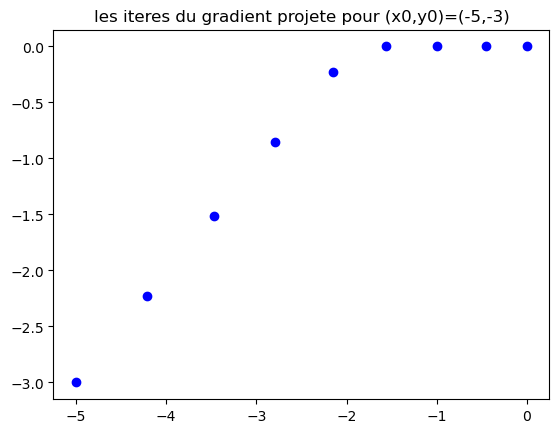

In [2]:
# Définition de la fonction J
def J(x,y):
    return 2*x**2+3*x*y+2*y**2
# le gradient de J
def gradJ(x,y):
    return np.array([4*x+3*y,4*y+3*x])


#Operateur de la projection sur notre ensemble convexe
def Projection(x,y):
    return np.array([min(0,x+0.5),min(0,y+0.5)])

def gradient_proj(J,gradJ,x0,eps,s,max):
    iter=0
    x=x0
    d=-gradJ(x[0],x[1])
    x_list=[x0]
    while np.linalg.norm(d)>eps and iter<max:
        x=Projection(x[0]+s*d[0],x[1]+s*d[1])
        d=-gradJ(x[0],x[1])
        x_list.append(x)
        iter=iter+1
    return np.array(x_list),iter

x0=np.array([-5,-3])

x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)
s = 0.01
x_list_proj,iter=gradient_proj(J,gradJ,x0,0.01,s,100)
print(iter)

plt.figure()
plt.plot(x_list_proj[:,0],x_list_proj[:,1],'bo', label='')
plt.title("les iteres du gradient projete pour (x0,y0)=(-5,-3)")
plt.show()

# 3. Méthode de pénalisation. Nous allons reprendre le même problème que précédemment, et évaluer une méthode de pénalisation. On propose les étapes suivantes :

# a) Mettre en place une fonction de pénalisation $x \mapsto \phi(x)$, en réfléchissant à l'expression qu'elle aura sur le cadran $Q$ (attention la fonction pénalisée doit être différentiable). Déterminer alors le gradient de la fonction pénalisée.




# Méthode de la pénalisation : On définit la fonction pénalisée par
D'abord pour déterminer $\phi(x, y)$ on va préciser les fonctions $g_{i}(x,y)$ tell que :

$g_{i}(x,y) \leq 0$  alors d'après le cadran $Q$ on a : $g_{1}(x,y) = x + 0.5 \quad g_{2}(x,y) = y + 0.5 $

$$
\phi(x, y) = \max(0,g_{1}(x,y))^2 + \max(0,g_{2}(x,y))^2 = \max(0, x + 0.5)^2 + \max(0, y + 0.5)^2
$$

Cette fonction est différentiable (on remplece le maximum par son expression et puisque $x|x|$ différentiable), son gradient est

$$
\nabla \phi(x, y) = (2\max(0, x + 0.5), 2\max(0, y + 0.5))
$$

Ainsi, on a $\phi(x, y) = 0$ si et seulement si $(x, y)$ est dans $Q$.
Parsuite, notre fonction objective devient

$$
J_{\epsilon}(x,y) = J(x, y) + \frac{1}{\epsilon} \phi(x, y)
             = 2x^2 + 3xy + 2y^2 + \frac{1}{\epsilon}  (\max(0, x + 0.5)^2 + \max(0, y + 0.5)^2)
$$


In [3]:

#Méthode de pénalisation

def Jeps(x,y,eps):
    return J(x,y)+(1/eps)*((np.maximum(0,x+0.5))**2+(np.maximum(0,y+0.5))**2)

def gradJeps(x,y,eps):
    return gradJ(x,y)+(2/eps)*np.array([np.maximum(0,x+0.5),np.maximum(0,y+0.5)])

def gradient_fix(Jeps,gradJeps,x0,s,epsilon,eps):
    iter=0
    x=x0
    x_list=[x0]
    d=-gradJeps(x[0],x[1],eps)
    while np.linalg.norm(d)>epsilon and iter<50000:
        x=x+s*d
        d=-gradJeps(x[0],x[1],eps)
        x_list.append(x)
        iter=iter+1
    return np.array(x_list),iter

x = np.linspace(-20, 20, 600)
y = np.linspace(-20, 20, 60)
X,Y=np.meshgrid(x,y)

# b) Tracer les courbes de niveau de la nouvelle fonction coût et son gradient, pour plusieurs valeurs de $\varepsilon$. Que constatez-vous ?

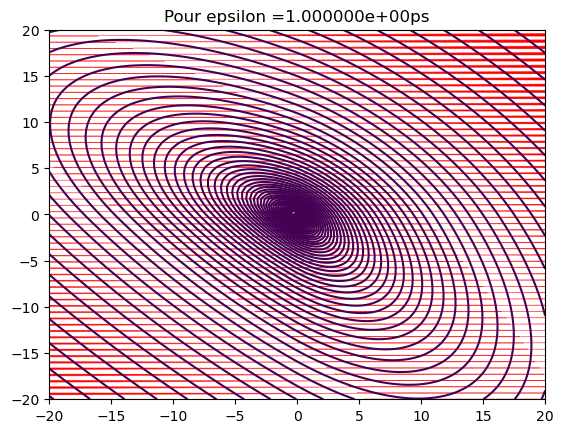

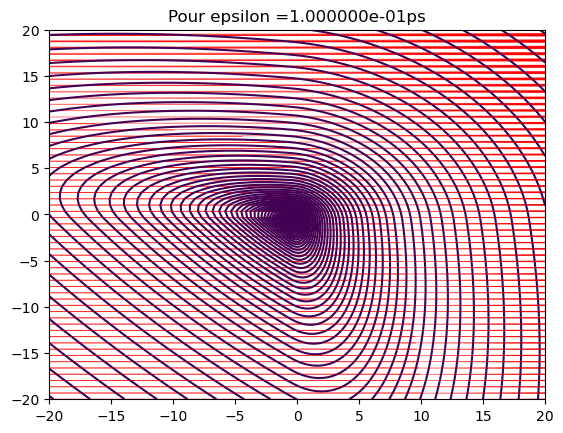

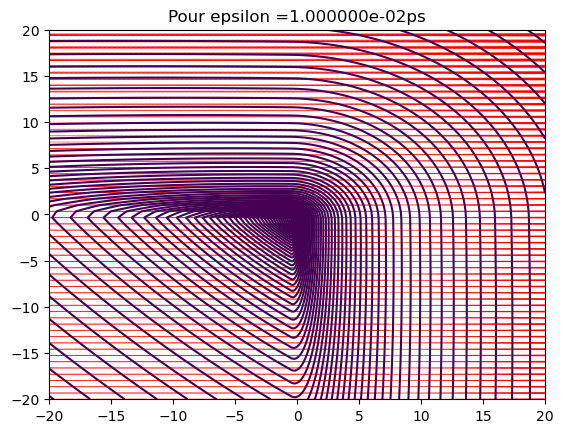

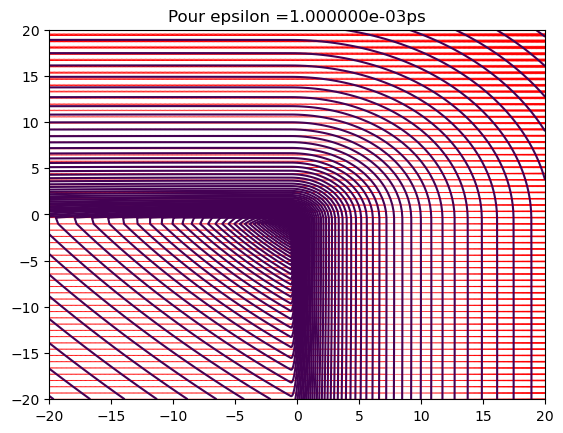

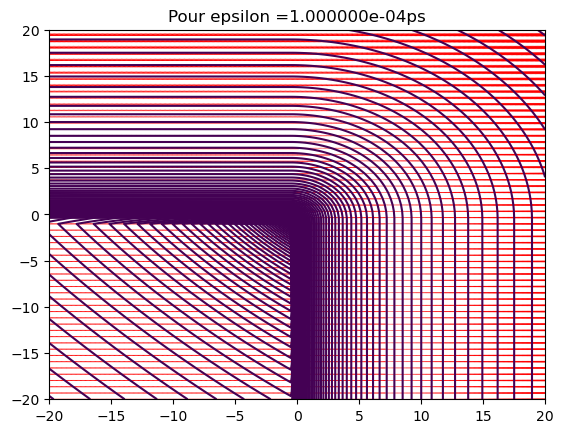

In [4]:
#Les lignes de niveau et son gradient pour plusieurs valeurs de epsilon
for eps in [1,0.1,0.01,0.001,0.0001]:
    plt.figure()
    plt.contour(X, Y, Jeps(X,Y,eps),levels=np.logspace(-20, 20, 600))
    U, V = [gradJeps(X,Y,eps)[0],gradJeps(X,Y,eps)[1]]
    plt.quiver(X, Y, U, V, color='red')
    plt.title("Pour epsilon =%eps" %eps)
    plt.show()






# Remarque : 
Quand le paramètre $ϵ$ est très petit, le rapport $\frac{1}{ϵ}$  devient grand. En conséquence, les lignes de niveaux de la fonction pénalisée se concentrent autour de ∂Q.

Ainsi, plus le paramètre $ϵ$ est réduit, plus l'importance accordée à la pénalisation augmente.

c) Pour une valeur petite de $\varepsilon$, par exemple $\varepsilon=10^{-4}$ (pénalisation forte), et un point de départ $x_0=(-0.3,0.5)^T$, tester la méthode de pénalisation pour la méthode de gradient à pas fixe. En visualisant les itérés, commenter la vitesse de convergence. Répéter le test pour $\varepsilon=0.5$ (pénalisation faible). Que peut-on dire de la convergence? Quid de la solution trouvée?



nombre des iteration pour s = 0.001 fort 50000
nombre des iteration pour s = 0.001 faible 2496


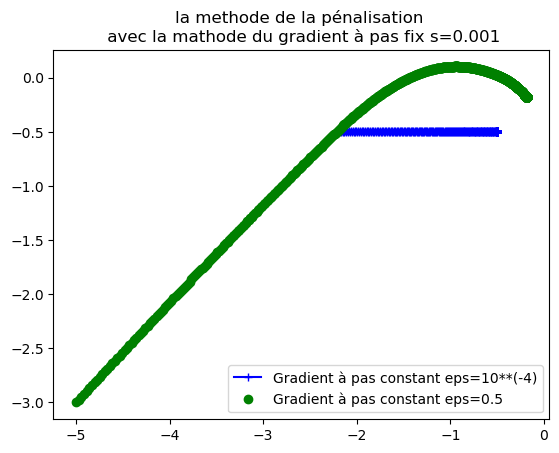

nombre des iteration pour s = 0.01 fort 50000
nombre des iteration pour s = 0.01 faible 245


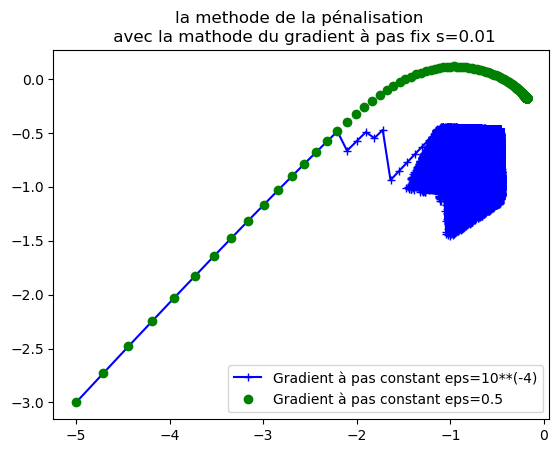

In [5]:
###############################################
#Pour s=0.001
eps1 = 10e-4
eps2 = 0.5
s = 0.001
epsilon = 0.0001
x_sol_forte,iter1=gradient_fix(Jeps,gradJeps,x0,s,epsilon,eps1)
print("nombre des iteration pour s = 0.001 fort",iter1)
x_sol_faible,iter2=gradient_fix(Jeps,gradJeps,x0,s,epsilon,eps2)
print("nombre des iteration pour s = 0.001 faible",iter2)

plt.figure(1)
plt.plot(x_sol_forte[:,0],x_sol_forte[:,1],'b+-', label='Gradient à pas constant eps=10**(-4)')
plt.plot(x_sol_faible[:,0],x_sol_faible[:,1],'go', label='Gradient à pas constant eps=0.5')
plt.title("la methode de la pénalisation \n avec la mathode du gradient à pas fix s=0.001")
plt.legend()
plt.show()
#################################################
#Pour s=0.01
s=0.01
x_sol_forte1,iter1=gradient_fix(Jeps,gradJeps,x0,s,epsilon,eps1)
print("nombre des iteration pour s = 0.01 fort",iter1)
x_sol_faible1,iter2=gradient_fix(Jeps,gradJeps,x0,s,epsilon,eps2)
print("nombre des iteration pour s = 0.01 faible",iter2)
plt.figure(2)
plt.plot(x_sol_forte1[:,0],x_sol_forte1[:,1],'b+-', label='Gradient à pas constant eps=10**(-4)')
plt.plot(x_sol_faible1[:,0],x_sol_faible1[:,1],'go', label='Gradient à pas constant eps=0.5')
plt.title("la methode de la pénalisation \n avec la mathode du gradient à pas fix s=0.01")
plt.legend()
plt.show()

# Remarque :
Lorsque $s = 0.001$, la méthode de pénalisation forte converge vers $[-0.51260452, -0.52084157]$ après exactement 50 000 itérations. En revanche, la méthode de pénalisation faible converge vers $[-0.18183232, -0.18180405]$ après seulement 2 045 itérations. Par conséquent, la méthode de pénalisation forte est plus efficace. Cependant, si $s = 0.01$, notre méthode de pénalisation ne converge pas pour $\epsilon = 10^{-4}$.

d) Pour aller plus loin (optionnel). Implémenter la méthode du gradient à pas optimal pour le problème pénalisé.

In [6]:
# La méthode de la séction dorée
def Section_dorré(x,d,a,b,t):
    iter=0
    z=a
    t=b
    r=(-1+np.sqrt(5))/2
    while abs(t-z)>0.001 and iter<50000:
        z=a+(1-r)*(b-a)
        t=a+r*(b-a)
        # on sait que argmin(f)=argmax(-f)
        if -Jeps(x[0]+z*d[0],x[1]+z*d[1],t)<-Jeps(x[0]+t*d[0],x[1]+t*d[1],t):
            a=z
        else:
            b=t
        iter=iter+1
    return a


[-0.509 -0.469]


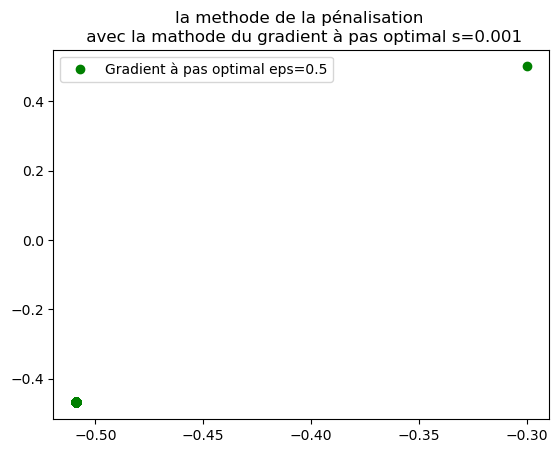

In [7]:

def gradient_opt(Jeps,gradJeps,x0,eps,t):
    iter=0
    x=x0
    x_list=[x0]
    d=-gradJeps(x[0],x[1],t)
    # le choix de pas optimal pour la méthode de la pénalisation
    pas=Section_dorré(x,d,0.19,1,t)
    while np.linalg.norm(d)>eps and iter<50000:
        x=x+pas*d
        d=-gradJeps(x[0],x[1],t)
        pas=Section_dorré(x,d,0,1,t)
        x_list.append(x)
        iter=iter+1
    return np.array(x_list),iter
x0=np.array([-0.3,0.5])
eps=0.5


#Pour s=0.001
s=0.0001
x_sol,iter2=gradient_opt(Jeps,gradJeps,x0,s,eps)
print(x_sol[-1])

plt.figure(1)
plt.plot(x_sol[:,0],x_sol[:,1],'go', label='Gradient à pas optimal eps=0.5')
plt.title("la methode de la pénalisation \n avec la mathode du gradient à pas optimal s=0.001")
plt.legend()
plt.show()

Pour la méthode de la section dorée, le choix des bornes de l'intervalle est très important. Cependant, il peut être difficile de déterminer ces bornes. Par exemple, dans ce cas, j'ai choisi l'intervalle [0.19, 1].

# Exercice 2 (méthodes de type gradient pour des fonctions quadratiques).
On considère le problème de l'optimisation d'un portefeuille. Supposons que l'on possède $n$ actions, que l'on représente par des variable aléatoires $R_1, \ldots, R_n$. Chaque action rapporte en moyenne à l'actionnaire $e_i=\mathbb{E}\left(R_i\right)$ (espérance de $R_i$ ) au bout d'un an. On suppose que l'on investit une somme $S$ donnée et on note $x_i \in \mathbb{R}$, la proportion de la somme investie dans l'action $i$. Ainsi, on a $\sum_{i=1}^n x_i=1$ que l'on réécrira $\langle x, u\rangle=1$ avec $u=[1, \ldots, 1]^T$. Le portefeuille total est représenté par la variable aléatoire $R=\sum_{i=1}^n x_i R_i$ et rapporte donc en moyenne
$$
\mathbb{E}(R)=\sum_{i=1}^n x_i e_i=\langle x, e\rangle .
$$

On désire imposer un rendement donné $r_0>0$, ce qui se traduit par $r_0=\langle x, e\rangle$. On modélise le risque du portefeuille par $\sigma^2(x)=\mathbb{E}\left[(R-\mathbb{E}(R))^2\right]$. On note $A=\left(a_{i j}\right)_{1 \leqslant i, j \leqslant n}$ la matrice de covariance définie par la relation
$$
\forall(i, j) \in \llbracket 1, n \rrbracket^2, \quad a_{i j}=E\left[\left(R_i-\mathbb{E}\left(R_i\right)\right)\left(R_j-\mathbb{E}\left(R_j\right)\right)\right] .
$$

On peut alors écrire que $\sigma^2(x)=\langle x, A x\rangle$. On appelle $J$, la fonction définie sur $R^n$ par
$$
J(x)=\frac{1}{2}\langle x, A x\rangle .
$$

On désigne par $K$, l'ensemble des contraintes, soit
$$
K=\left\{x \in \mathbb{R}^n \mid\langle h, u\rangle=1 \text { et }\langle x, e\rangle=r_0\right\} .
$$

L'objectif de cet exercice est de résoudre numériquement le problème
$$
\inf _{x \in K} J(x)
$$

1. Mettre l'ensemble des contraintes sous la forme $K=\left\{x \in \mathbb{R}^n: C x=f\right\}$, où $C$ et $f$ désignent respectivement une matrice et un vecteur à préciser. Rappeler comment se traduisent les conditions d'optimalité de ce problème et formuler l'équation en $\mathrm{x}$ à résoudre à chaque itération.




Tout d'abord, l'ensemble des contraintes peut être exprimé comme suit :
 
$K = \{x \in \mathbb{R}^n, Cx = f\}$ 

À partir des données de l'exercice et des calculs, on trouve que $C = \begin{bmatrix} 1 & 1 & 1 & \cdots & 1 \\ 1 & 2 & 3 & \cdots & n \end{bmatrix}$ et $f = [1,2.5]$

Les conditions d’optimalité de ce problème sont établies grâce au théorème de Kuhn-Tucker. En effet, les contraintes sont qualifiées car elles peuvent être écrites comme suit :

$K = \{x = (x_1, ..., x_n) \in \mathbb{R}^n, h_1(x) = 0, h_2(x) = 0\}$ où $h_1(x) = \sum_{i=1}^{n} x_i - 1$ et $h_2(x) = \sum_{i=1}^{n} i x_i - 2.5$. Ces fonctions sont affines, donc les vecteurs $(\nabla h_1(x),\nabla h_2(x))$ sont linéairement indépendants.

Supposons que $x$ est notre solution. Puisque les contraintes sont qualifiées, on peut facilement déduire qu'il existe $\lambda_1,\lambda_2 \in \mathbb{R}$ tels que $\nabla L(x, \lambda_1, \lambda_2) = \nabla J(x) + \lambda_1 \nabla h_1(x) + \lambda_2 \nabla h_2(x) = 0$ avec $h_1(x) = h_2(x) = 0$.

On rappelle que le lagrangien est donné dans ce cas par :

 $L(x, \lambda_1, \lambda_2) = J(x) + \lambda_1 h_1(x) + \lambda_2 h_2(x)$ 

En ce qui concerne la résolution de x à chaque itération, nous allons utiliser l'algorithme d'Uzawa. Puisque nous avons deux égalités, nous avons deux variables de Lagrange, $\lambda_1$ et $\lambda_2$. Le système devient alors : 
$\begin{cases} 
\lambda_{1,k+1} = \lambda_{1,k} + s h_1(x_k)  \\
\lambda_{2,k+1} = \lambda_{2,k} + s h_2(x_k)  \\
x_k = \text{Argmin}_{x \in \mathbb{R}^n} L(x, \lambda_{1,k+1}, \lambda_{2,k+1})
\end{cases}$


2. Supposons que $r_0=2.5$ et $e_i=i$ pour tout $i \in \llbracket 1, n \rrbracket$. Pour les tests numériques, on se placera par exemple dans le cas où $n=5$. Voici un programme permettant de générer une matrice $A$ :
$$
\begin{aligned}
& A=n p \cdot \operatorname{diag}(e) \\
& R=n p \cdot \operatorname{random} \cdot \operatorname{rand}(n, n) \\
& A=A+0.05 *(n p . \operatorname{transpose}(R) @ R)
\end{aligned}
$$

  Expliquer la dernière ligne du programme.

La dernière ligne du programme ajoute une petite perturbation à notre matrice diagonale $A$.
Cette perturbation est aussi une matrice symétrique qui est produit entre une matrice  aléatoire $R$ par sa transposée. Le facteur $0.05$ est utilisé pour contrôler cette perturbation.

In [8]:
# la taille de notre portfeuille
n=5
u=np.ones(n)
e = np.zeros(n)
for i in range(n):
    # comme on commence à 0
    e[i] = i+1
print(u)
print(e)

[1. 1. 1. 1. 1.]
[1. 2. 3. 4. 5.]


3. Pour différentes matrices $A$, programmer l'algorithme d'Uzawa. On n'oubliera pas d'imposer un nombre maximal d'itérations. Quel inconvénient majeur constatez-vous ici ?

In [9]:
r_0=2.5
C=np.array([u,e])
f=np.transpose(np.array([1,r_0]))
# la fonction J
def J(x):
    return 0.5*np.dot(np.dot(A,x),x)
# le gradient de J
def gradJ(x):
    return np.dot(A,x)
#Lagrangiene
def L(x,lmda1,lmda2,e,r_0):
    return J(x)+(np.dot(x,u)-1)*lmda1*+(np.dot(x,e)-r_0)*lmda2

def gradL_x(x,lmda1,lmda2,e):
    return gradJ(x)+lmda1*u+lmda2*e
# maximum d'iteration est 100000
def gradient_fix(L,grad_L_x,x0,lmda1,lmda2,s,eps,e):
    iter=0
    x=x0
    d=-gradL_x(x,lmda1,lmda2,e)
    while np.linalg.norm(d)>eps and iter<100000:
        x=x+s*d
        d=-gradL_x(x,lmda1,lmda2,e)
        iter=iter+1
    return x

In [10]:
#Méthode d'Uzawa
def UZAWA(L,gradL_x,x0,lamda0,s,eps):
    iter=0
    x=x0
    lamda1=lamda0
    lamda2=lamda0
    d=-gradL_x(x,lamda1,lamda2,e)
    list_lamda_1=[lamda0]
    list_lamda_2=[lamda0]
    # les deux contraintes des égalités 
    G=np.array([np.dot(x,u)-1,np.dot(x,e)-r_0]) 
    while np.linalg.norm(G)>eps and np.linalg.norm(d)>eps and iter<100000:
        lamda1=lamda1+s*G[0]
        lamda2=lamda2+s*G[1]
        d=-gradL_x(x,lamda1,lamda2,e)#
        x=x+s*d 
        G=np.array([np.dot(x,u)-1,np.dot(x,e)-r_0])
        list_lamda_1.append(lamda1)
        list_lamda_2.append(lamda2)
        iter=iter+1
    return np.array(x),np.array(list_lamda_1),np.array(list_lamda_2),iter

# A est diagonale et contient les valeurs de e
A = np.diag(e) 
R = np.random.rand(n,n)
A = A + 0.5*(np.transpose(R)@R) 
# X0 initialisation de notre portfeuille
x0=np.random.rand(n)
eps=1e-8
lamda0=2
s=0.001
x,lambda1,lambda2,nb_iter=UZAWA(L,gradL_x,x0,lamda0,s,eps)

# les résultats de la méthode d'Uzawa
print("méthode d'Uzawa :")
print("Notre x0 initiale : \n",x0)
print("Notre matrice A :\n",A)
print("Notre x :\n",x)
print("les valeurs de lambda1 :\n",lambda1)
print("les valeurs de lambda2 :\n",lambda2)
print("Nombre des iterations :\n",nb_iter)

méthode d'Uzawa :
Notre x0 initiale : 
 [0.52212783 0.62550627 0.17413705 0.36220457 0.58914517]
Notre matrice A :
 [[1.27112093 0.19075281 0.31779265 0.38307343 0.11428855]
 [0.19075281 2.40328162 0.54783586 0.60282716 0.10886624]
 [0.31779265 0.54783586 4.21115622 0.90411851 0.22399277]
 [0.38307343 0.60282716 0.90411851 5.27086672 0.37279939]
 [0.11428855 0.10886624 0.22399277 0.37279939 5.15549871]]
Notre x :
 [0.37898512 0.21759959 0.1155766  0.10010754 0.18773115]
les valeurs de lambda1 :
 [ 2.          2.00127312  2.00249524 ... -0.50020688 -0.50020688
 -0.50020688]
les valeurs de lambda2 :
 [ 2.          2.0041901   2.00820168 ... -0.11957042 -0.11957042
 -0.11957042]
Nombre des iterations :
 23310


# Remarque
L'inconvénient majeur de cet algorithme est qu'il peut ne pas converger si le pas de relaxation $s$ n'est pas correctement choisi. D'après le cours, si le Lagrangien admet un point selle, alors le choix de $s$ est bien choisi et que le méthode converge vers $\bar{x}$. Cependant, un problème peut survenir lors de la résolution de $x_k = \text{Argmin} L(x, \lambda_{1,k+1}, \lambda_{2,k+1})$.

4. Adapter l'algorithme pour palier ce problème.

Pour pallier ce problème, parmi les choix possibles, nous proposons de résoudre le problème $\text{Argmin} L(x, \lambda_{1,k+1}, \lambda_{2,k+1})$.

Nous savons que $J$ est continue en tant que produit scalaire et coercive car la matrice $A$ est symétrique et définie positive. De plus, les contraintes sont affines, donc continues et de classe $C^1$ dans $\mathbb{R}^n$, qui est un ensemble fermé et non vide. Par conséquent, d'après la caractérisation d'Euler, nous avons $\nabla_x L(x, \lambda_{1,k+1}, \lambda_{2,k+1}) = 0$ pour trouver l'Argmin de L.

$\nabla_x L(x, \lambda_{1,k+1}, \lambda_{2,k+1}) = 0 \iff A x_{k+1} + C_1^T \lambda_{1,k+1} + C_2^T \lambda_{2,k+1} = 0$

D'où :

$x_{k+1} = -A^{-1}(C_1^T \lambda_{1,k+1} + C_2^T \lambda_{2,k+1})$

In [11]:

#Méthode d'Uzawa modifier
def uzawa_m(L,x0,lamda0,s,eps):
    iter=0
    x=x0
    lamda1=lamda0
    lamda2=lamda0
    list_labda_1=[lamda0]
    list_labda_2=[lamda0]
    G=np.array([np.dot(x,u)-1,np.dot(x,e)-r_0]) 
    while np.linalg.norm(G)>eps and iter<100000:
        lamda1=lamda1+s*G[0]
        lamda2=lamda2+s*G[1]
        x=np.linalg.solve(-A,np.transpose(C[0])*lamda1+np.transpose(C[1])*lamda2)
        G=np.array([np.dot(x,u)-1,np.dot(x,e)-r_0])
        list_labda_1.append(lamda1)
        list_labda_2.append(lamda2)
        iter=iter+1
    return np.array(x),np.array(list_labda_1),np.array(list_labda_2),iter

x_mod,lambda1_mod,lambda2_mod,nb_iter_mod=uzawa_m(L,x0,lamda0,s,eps)

print("\n méthode d'Uzawa modifier :")
print("Notre x0 initiale : \n",x0)
print("Notre matrice A :\n",A)
print("Notre x mod :\n",x_mod)
print("les valeurs de lambda1 mod:\n",lambda1_mod)
print("les valeurs de lambda2 mod :\n",lambda2_mod)
print("Nombre des iterations mod :\n",nb_iter_mod)


 méthode d'Uzawa modifier :
Notre x0 initiale : 
 [0.52212783 0.62550627 0.17413705 0.36220457 0.58914517]
Notre matrice A :
 [[1.27112093 0.19075281 0.31779265 0.38307343 0.11428855]
 [0.19075281 2.40328162 0.54783586 0.60282716 0.10886624]
 [0.31779265 0.54783586 4.21115622 0.90411851 0.22399277]
 [0.38307343 0.60282716 0.90411851 5.27086672 0.37279939]
 [0.11428855 0.10886624 0.22399277 0.37279939 5.15549871]]
Notre x mod :
 [0.37898515 0.21759955 0.11557658 0.10010754 0.18773117]
les valeurs de lambda1 mod:
 [ 2.          2.00127312  1.99206141 ... -0.50020665 -0.50020665
 -0.50020665]
les valeurs de lambda2 mod :
 [ 2.          2.0041901   1.97740154 ... -0.11957048 -0.11957048
 -0.11957048]
Nombre des iterations mod :
 37873
